# Heart Disease Risk Analysis & Predictive Insights


### 1. Load and Explore the Dataset
- Load the dataset using pandas
- Display first 10 rows
- Check data types
- Find missing values
- Display summary statistics


In [9]:
import pandas as pd  #Load dataset
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Administrator\Desktop\python\Heart Disease UCI.csv")
print("\nDataset\n\n\n",df.head(10))
print("\nCount of Null Values per column\n\n\n",df.isna().sum()) #checking null values

print("\nData Types of Each Column\n\n\n") 
print(df.dtypes)  #Validating data types
print("\nStatistical Summary\n\n\n",df.describe())  # summary statistics



Dataset


    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   
5   64    1   0       170   227    0        2      155      0      0.6      1   
6   63    1   0       145   233    1        2      150      0      2.3      2   
7   61    1   0       134   234    0        0      145      0      2.6      1   
8   60    0   0       150   240    0        0      171      0      0.9      0   
9   59    1   0       178   270    0        2      145      0      4.2      2   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          

### 2. Gender Distribution Analysis
- Count number of males and females
- Calculate percentage distribution using NumPy
- Plot a bar chart using Matplotlib


In [150]:
# Count number of males and females
sex_count=df['sex'].value_counts()
sex_count

sex
1    201
0     96
Name: count, dtype: int64

In [12]:
# Calculate percentage distribution using NumPy

per = df.groupby('sex').size() / len(df) * 100
print(per)

sex
0    32.323232
1    67.676768
dtype: float64


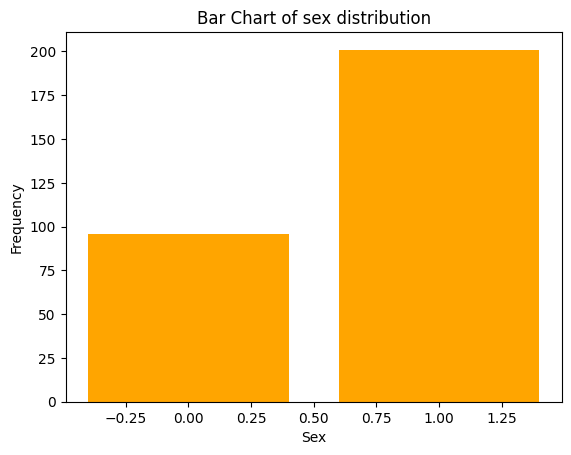

In [151]:
# Plot a bar chart 
plt.bar(sex_count.index, sex_count.values, color="orange")
plt.title("Bar Chart of sex distribution")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

### 3.Age Analysis
- Find:
    - Minimum age
    - Maximum age
    - Mean age
    - Median age
- Plot histogram of age distribution


29
77
54.54208754208754
56.0


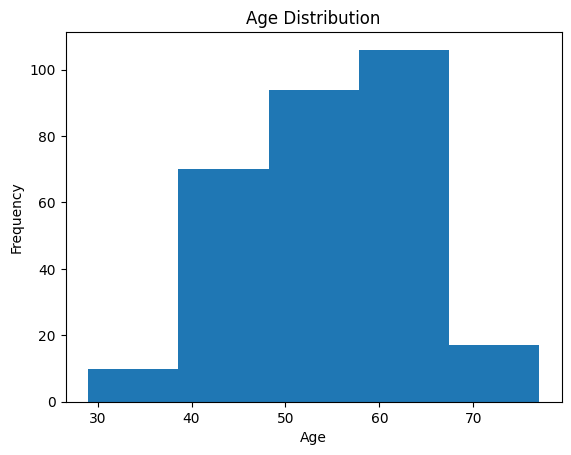

In [152]:
print(df['age'].min()) #minimum age
print(df['age'].max()) #maximum age
print(df['age'].mean()) #mean age
print(df['age'].median()) #minimum age

plt.hist(df['age'],bins=5)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

 ### 4. Target Variable Analysis
- Count number of patients with and without heart disease
- Plot pie chart
- Calculate disease percentage


In [153]:
# Count number of patients with and without heart disease

counts=df['condition'].value_counts()
counts

condition
0    160
1    137
Name: count, dtype: int64

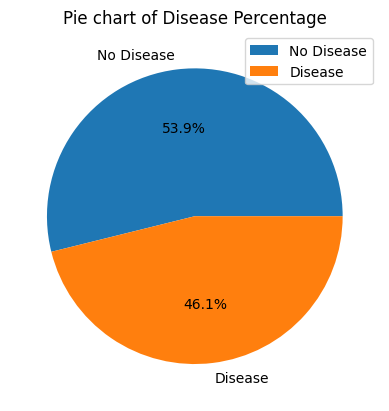

In [154]:
# Plot pie chart 
plt.pie(counts,labels=["No Disease","Disease"], autopct="%1.1f%%")
plt.title("Pie chart of Disease Percentage")
plt.legend()

plt.show()

In [155]:
# Calculate disease percentage
per=df['condition'].value_counts().mean()*100
per

14850.0

### 5. Correlation Between Age and Cholesterol
- Calculate correlation using df.corr()
- Plot scatter plot (Age vs Cholesterol)
- Interpret relationship


In [156]:
# Calculate correlation using df.corr()

df[['age','chol']].corr()

,age,chol
age,1.000000,0.202644
chol,0.202644,1.000000


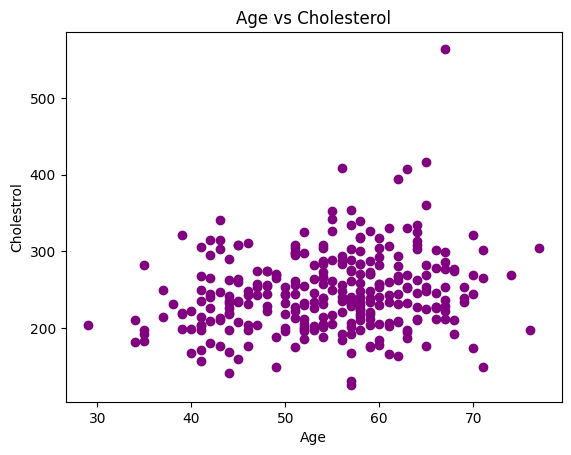

In [158]:
# Plot scatter plot (Age vs Cholesterol)

plt.scatter(df['age'],df['chol'],color='purple')
plt.xlabel("Age")
plt.ylabel('Cholestrol')
plt.title("Age vs Cholesterol")
plt.show()

In [21]:
# Interpret relationship

cor = df['age'].corr(df['chol'])
print("Correlation =",cor)

if cor > 0.5:
    print("Strong positive relationship")
elif cor > 0:
    print("Weak positive relationship")
elif cor > -0.5:
    print("Weak negative relationship")
else:
    print("Strong negative relationship")

Correlation = 0.20264354584662683
Weak positive relationship


### 6. Chest Pain Type vs Disease
- Group by cp and calculate disease rate
- Plot grouped bar chart
- Identify which chest pain type is most risky


In [159]:
# Group by cp and calculate disease rate

grouped=df.groupby('cp')['condition'].mean()*100
grouped

cp
0    30.434783
1    18.367347
2    21.686747
3    72.535211
Name: condition, dtype: float64

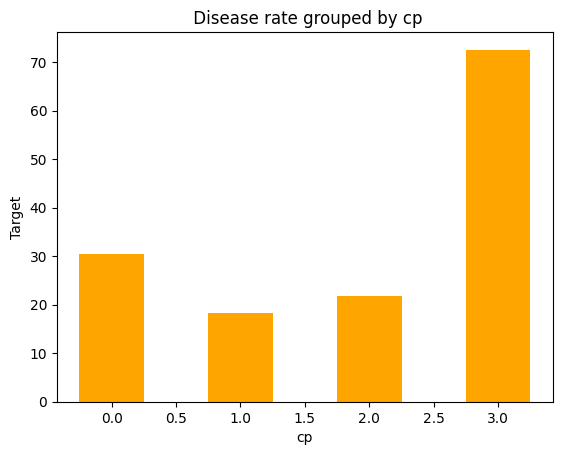

In [160]:
# Plot grouped bar chart
plt.bar(grouped.index, grouped.values, color="orange", width=0.5)
plt.title(" Disease rate grouped by cp")
plt.xlabel("cp")
plt.ylabel("Target")
plt.show()

In [163]:
# Identify which chest pain type is most risky

most_risky_cp = grouped.idxmax() 
most_risky_cp

3

### 7. Average Cholesterol by Gender
- Group by sex
- Calculate mean cholesterol
- Visualize using bar plot


In [14]:
# Group by sex 
grp=df.groupby('sex')['chol'].mean()
grp

sex
0    262.229167
1    240.243781
Name: chol, dtype: float64

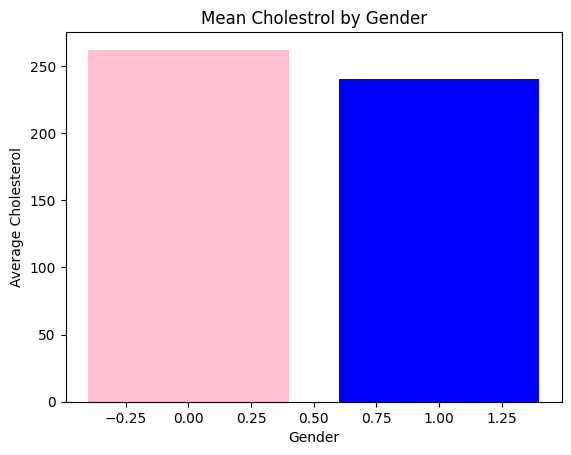

In [17]:
#Calculate mean cholesterol Visualize using bar plot
avg_chol_by_gender=df.groupby('sex')['chol'].mean()
plt.bar(avg_chol_by_gender.index, avg_chol_by_gender.values, color=['pink','blue'])
plt.title("Mean Cholestrol by Gender")
plt.xlabel("Gender") 
plt.ylabel("Average Cholesterol")
plt.show()

### 8. Resting Blood Pressure Analysis
- Find:
  - Average BP
  - Patients with BP > 140
- Compare disease presence in high BP group


In [116]:
# Average BP
print(df['trestbps'].mean())

131.69360269360268


In [29]:
# Patients with BP > 140

high_bp=df[df['trestbps'] > 140]
print(high_bp)
print("count =",high_bp.count())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
2     66    0   0       150   226    0        0      114      0      2.6   
5     64    1   0       170   227    0        2      155      0      0.6   
6     63    1   0       145   233    1        2      150      0      2.3   
8     60    0   0       150   240    0        0      171      0      0.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
263   50    1   3       150   243    0        2      128      0      2.6   
264   50    1   3       144   200    0        2      126      1      0.9   
277   45    1   3       142   309    0        2      147      1      0.0   
285   43    1   3       150   247    0        0      171      0      1.5   
292   40    1   3       152   223    0        0      181      0      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
2        2   0     

In [30]:
# Compare disease presence in high BP group
print(high_bp['condition'].value_counts(normalize=True) * 100)

condition
1    59.090909
0    40.909091
Name: proportion, dtype: float64


### 9. Maximum Heart Rate vs Disease
- Compare average thalach for:
  - Disease patients
  - Non-disease patients
- Plot boxplot


In [181]:
# Compare average thalach for:
# Disease patients

print(df.groupby('condition')['thalach'].mean())
# Non-disease patients

condition
0    158.581250
1    139.109489
Name: thalach, dtype: float64


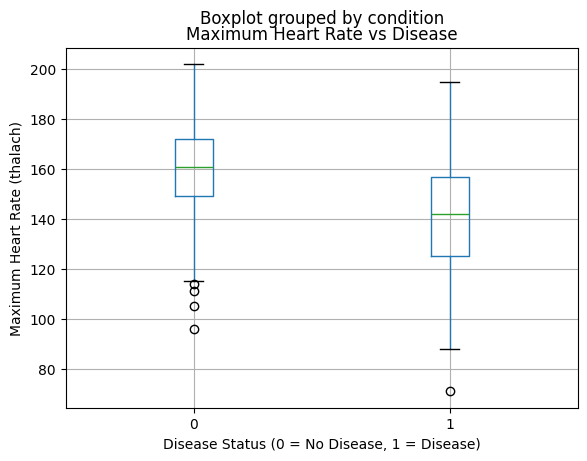

In [5]:
df.boxplot(column='thalach', by='condition') 
plt.title("Maximum Heart Rate vs Disease")
 
plt.xlabel("Disease Status") 
plt.ylabel("Maximum Heart Rate") 
plt.show()

### 10. Exercise Induced Angina Impact
- Calculate disease percentage in:
    - exang = 1
    - exang = 0
- Visualize using bar chart


In [121]:
# Calculate disease percentage in:
# exang = 1
disease_percentage = df.groupby('exang')['condition'].mean() * 100

print("Disease percentage by exang:")
print(disease_percentage)

# exang = 0

Disease percentage by exang:
exang
0    31.50000
1    76.28866
Name: condition, dtype: float64


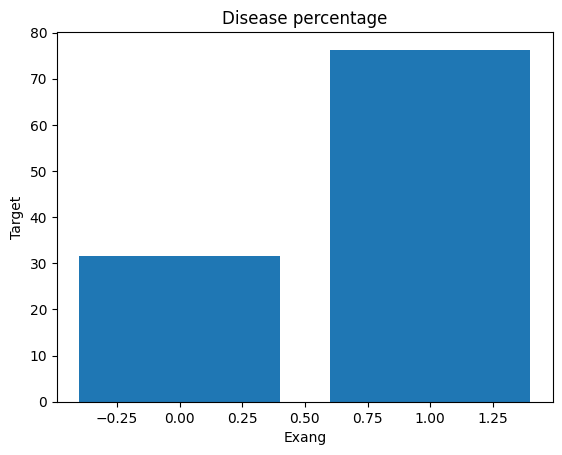

In [187]:
plt.bar(disease_percentage.index,disease_percentage.values)
plt.xlabel("Exang")
plt.ylabel("Target")
plt.title("Disease percentage")
plt.show()

### 11. ST Depression (oldpeak) Analysis
- Calculate mean oldpeak by target
- Plot histogram for both classes
- Identify trend



In [34]:
# Calculate mean oldpeak by target

oldpeak_mean=df.groupby('condition')['oldpeak'].mean()
oldpeak_mean

condition
0    0.598750
1    1.589051
Name: oldpeak, dtype: float64

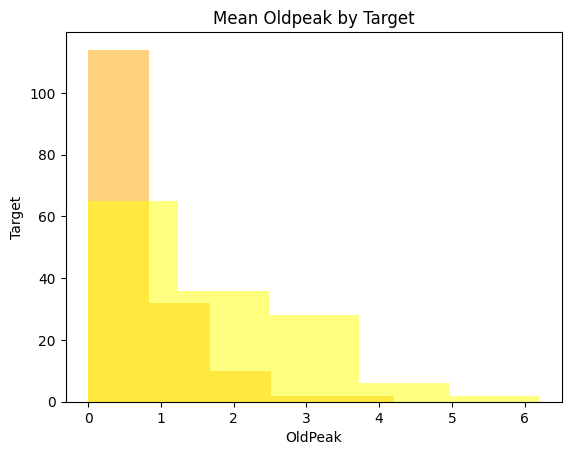

In [64]:
# Plot histogram for both classes
plt.hist(df[df['condition'] == 0]['oldpeak'],bins=5,color="orange",alpha=0.5)

plt.hist(df[df['condition'] == 1]['oldpeak'],bins=5,color="yellow",alpha=0.5)
plt.title("Mean Oldpeak by Target")
plt.xlabel("OldPeak")
plt.ylabel("Target")
plt.show()


In [35]:

if oldpeak_mean[1] > oldpeak_mean[0]:
    print("Trend: Higher ST Depression in patients with Heart Disease.")
elif oldpeak_mean[1] < oldpeak_mean[0]:
    print("Trend: Lower ST Depression in patients with Heart Disease.")
else:
    print("Trend: No significant difference.")

Trend: Higher ST Depression in patients with Heart Disease.


### 12. Number of Major Vessels (ca) Impact
-  Group by ca
-  Calculate disease probability
-  Plot line chart


In [36]:
# Group by ca
grouped=df.groupby("ca")['condition'].mean()
grouped


ca
0    0.258621
1    0.676923
2    0.815789
3    0.850000
Name: condition, dtype: float64

In [39]:
# Calculate disease probability
print(grouped*100)

ca
0    25.862069
1    67.692308
2    81.578947
3    85.000000
Name: condition, dtype: float64


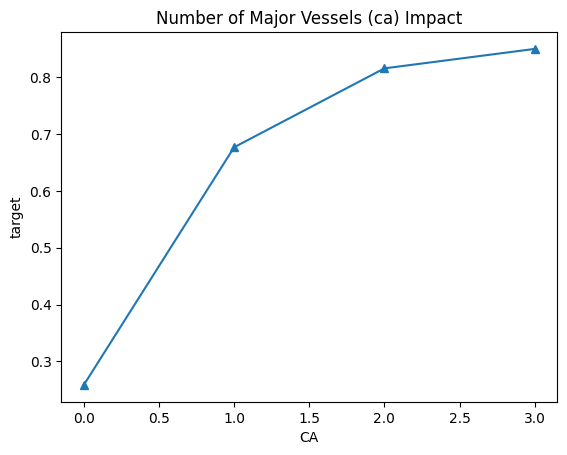

In [41]:
# Plot line chart

plt.plot(grouped.index, grouped.values, marker="^")
plt.xlabel("CA")
plt.ylabel("target")
plt.title("Number of Major Vessels (ca) Impact")
plt.show() #displays the plot

### 13. Thalassemia vs Disease
- Cross-tabulate thal and target
- Convert to percentage
- Plot stacked bar chart


condition          0          1
thal                           
0          77.439024  22.560976
1          33.333333  66.666667
2          23.478261  76.521739


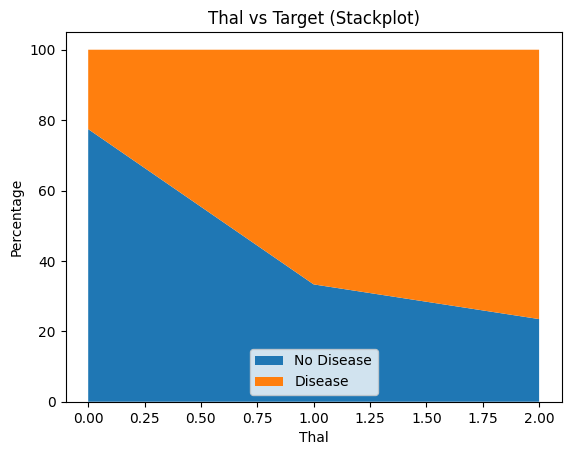

In [18]:
# Cross-tabulate thal and target

ct = pd.crosstab(df['thal'], df['condition'], normalize='index').mul(100)
print(ct)

x = ct.index
y1 = ct[0]
y2 = ct[1]

plt.stackplot(x, y1, y2, labels=['No Disease', 'Disease'])

plt.xlabel('Thal')
plt.ylabel('Percentage')
plt.title('Thal vs Target (Stackplot)')
plt.legend()
plt.show()




### 14. Multi-Factor Risk Analysis
- Find patients with:
  - Age > 50
  - Cholesterol > 240
  - BP > 140
- Calculate percentage having disease



In [144]:
# Find patients with:
# Age > 50
# Cholesterol > 240
# BP > 140


print(df[(df['age']>50) &(df['chol']>240) &(df['trestbps']>140)])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
9     59    1   0       178   270    0        2      145      0      4.2   
10    59    1   0       170   288    0        2      159      0      0.2   
11    59    1   0       160   273    0        2      125      0      0.0   
13    58    0   0       150   283    1        2      162      0      1.0   
16    52    1   0       152   298    1        0      178      0      1.2   
24    71    0   1       160   302    0        0      162      0      0.4   
25    70    1   1       156   245    0        2      143      0      0.0   
26    66    1   1       160   246    0        0      120      1      0.0   
45    54    1   1       192   283    0        2      195      0      0.0   
74    70    1   2       160   269    0        0      112      1      2.9   
76    68    1   2       180   274    1        2      150      1      1.6   
81    67    0   2       152   277    0        0      172      0      0.0   
82    66    

In [52]:
# Calculate percentage having disease
data=df[(df['age']>50) & (df['chol']>240) & (df['trestbps']>140)]['condition'].mean()*100
print(round(data,2),"%")

66.67 %


### 15. Create Risk Score (Custom Analysis)
- Create new column:
- risk_score = (chol/200) + (trestbps/120) + (oldpeak)


- Classify patients as:
  - Low Risk
  - Medium Risk
  - High Risk
- Visualize distribution


In [44]:
df['risk_score']=(df['chol']/200)+(df['trestbps']/120 )+ (df['oldpeak'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,risk_score
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0,2.603333
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0,4.161667
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0,4.980000
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1,3.960000
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0,3.771667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1,2.381667
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1,3.278333
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1,3.590000
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0,3.465000


In [57]:
def risk_category(score): 
    if score < 3: 
        return "Low" 
    elif score < 5: 
        return "Medium" 
    else: 
        return "High" 
df['category'] = df['risk_score'].apply(risk_category)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,risk_score,risk_category,category
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0,2.603333,Low,Low
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0,4.161667,Medium,Medium
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0,4.980000,Medium,Medium
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1,3.960000,Medium,Medium
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0,3.771667,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1,2.381667,Low,Low
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1,3.278333,Medium,Medium
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1,3.590000,Medium,Medium
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0,3.465000,Medium,Medium


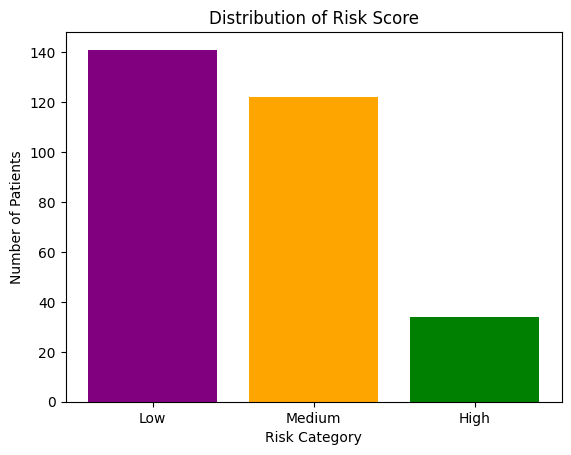

In [58]:
risks=df['category'].value_counts()
plt.bar(risks.index,risks.values, color=['purple','orange','green']) 
plt.title("Distribution of Risk Score") 
plt.xlabel("Risk Category") 
plt.ylabel("Number of Patients") 
plt.show()

### Insights

##### 1. Does cholesterol strongly impact heart disease?
   - Correlation between chol and condition is very weak.So cholestrol alone doesn't strongly impact heart disease.
##### 2. Is male population more vulnerable?
   - Yes,Disease rate among males is higher.
##### 3. Does exercise-induced angina significantly increase risk?
   - Yes,Patients with exang=1 has higher disease percentage.
##### 4. Which feature has strongest correlation with disease?
   - No of major vessels and ST depression
